# Machine Learning | Decision Tree vs KNN

**Name:** `JARANILLA, Yul Jhon O.`

___

**Instructor:** Jhun Brian M. Andam

**Course Code:** IT325

*IT3R9 and IT3R10*

### 🤖 Import Standard Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats

### 🔃 Load Dataset

- https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv
- <a href="https://github.com/jayachandru001/Heart-Failure-Prediction-">Data Description</a>

**Heart-Failure-Prediction**

Dataset contains 11 clinical features for predicting heart disease events.

This project helps to predict whether the patient has Heart Disease or not. This prediction is made using the clinical data of patients.

| Attribute      | Description                                                                                                                                                                                                                                |
|:---------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Age            | Age of a patient [years]                                                                                                                                                                                                                   |
| Sex            | Gender of the patient [M: Male, F: Female]                                                                                                                                                                                                 |
| ChestPain      | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]                                                                                                                                       |
| RestingBP      | Blood pressure in Hg (Normal blood pressure - 120/80 Hg)                                                                                                                                                                                   |
| Cholesterol    | Serum cholesterol level in blood (Normal cholesterol level below for adults 200mg/dL)                                                                                                                                                      |
| FastingBS      | Fasting Blood Sugar (Normal less than 100mg/dL for non diabetics for diabetes 100-125mg/dL)                                                                                                                                                |
| RestingECG     | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| MaxHR          | Maximum heart rate achieved [Numeric value between 60 and 202]                                                                                                                                                                             |
| ExerciseAngina | Exercise-induced angina [Y: Yes, N: No]                                                                                                                                                                                                    |
| Oldpeak        | oldpeak = ST [Numeric value measured in depression]                                                                                                                                                                                        |
| ST_Slope       | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]                                                                                                                                                   |
| HeartDisease   | output class [1: heart disease, 0: Normal]                                                                                                                                                                                                 |

In [2]:
dataset_url = 'https://raw.githubusercontent.com/jayachandru001/Heart-Failure-Prediction-/main/heart.csv'
heart_data = pd.read_csv(dataset_url)
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.0,918.000000,918.000000,918.000000
mean,53.510893,132.125272,203.985158,0.0,136.819172,0.877778,0.553377
std,9.432617,16.993314,95.922341,0.0,25.432057,1.031693,0.497414
min,28.000000,90.000000,32.625000,0.0,66.000000,-2.250000,0.000000
25%,47.000000,120.000000,173.250000,0.0,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.0,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.0,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,0.0,202.000000,3.750000,1.000000


### 🔎Examine Dataset

- Descriptive Statistics / Hypothesis Test
- Look for Null Values / Outliers

Descriptive Statistics:
               Age   RestingBP  Cholesterol  FastingBS       MaxHR     Oldpeak  \
count  918.000000  918.000000   918.000000      918.0  918.000000  918.000000   
mean    53.510893  132.125272   203.985158        0.0  136.819172    0.877778   
std      9.432617   16.993314    95.922341        0.0   25.432057    1.031693   
min     28.000000   90.000000    32.625000        0.0   66.000000   -2.250000   
25%     47.000000  120.000000   173.250000        0.0  120.000000    0.000000   
50%     54.000000  130.000000   223.000000        0.0  138.000000    0.600000   
75%     60.000000  140.000000   267.000000        0.0  156.000000    1.500000   
max     77.000000  170.000000   407.625000        0.0  202.000000    3.750000   

       HeartDisease  
count    918.000000  
mean       0.553377  
std        0.497414  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

Hypothesis Test:
 T-Statistic: -93.06, P-value

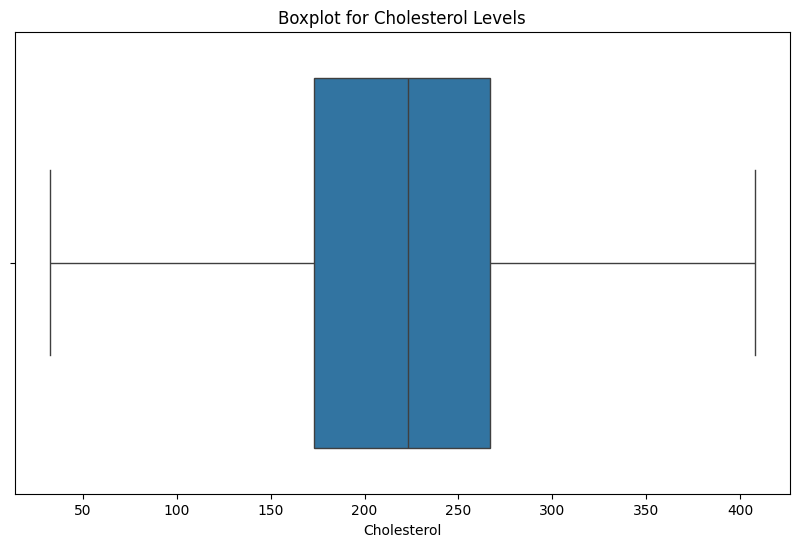

In [13]:
descriptive_stats = heart_data.describe()
t_statistic, p_value = stats.ttest_ind(heart_data['Age'], heart_data['MaxHR'])
null_values = heart_data.isnull().sum()

plt.figure(figsize=(10, 6))
sns.boxplot(x=heart_data['Cholesterol'])
plt.title('Boxplot for Cholesterol Levels')

print("Descriptive Statistics:\n", descriptive_stats)
print("\nHypothesis Test:\n T-Statistic: {:.2f}, P-value: {:.2f}".format(t_statistic, p_value))
print("\nNull Values in the dataset:\n", null_values)

plt.show()

### 🧩Prepare Dataset
- Treat null values / outliers
- Data Transformation
- Train Test Split (75:25)

In [14]:
numeric_columns = heart_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = heart_data.select_dtypes(include=['object']).columns

# Treat null values
for column in numeric_columns:
    heart_data[column] = heart_data[column].fillna(heart_data[column].median())

print("Null values after treatment:")
print(heart_data.isnull().sum())

# Outliers
for col in numeric_columns:
    col_Q1 = heart_data[col].quantile(0.25)
    col_Q3 = heart_data[col].quantile(0.75)
    col_IQR = col_Q3 - col_Q1
    col_lower_cap = col_Q1 - 1.5 * col_IQR
    col_upper_cap = col_Q3 + 1.5 * col_IQR
    heart_data[col] = heart_data[col].clip(lower=col_lower_cap, upper=col_upper_cap)


print("\nDescriptive statistics after capping outliers:")
print(heart_data[numeric_columns].describe())

heart_data_encoded = pd.get_dummies(heart_data, columns=categorical_columns, drop_first=True)

X = heart_data_encoded.drop('HeartDisease', axis=1)
y = heart_data_encoded['HeartDisease']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("\nShapes of the train-test split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


Null values after treatment:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Descriptive statistics after capping outliers:
              Age   RestingBP  Cholesterol  FastingBS       MaxHR     Oldpeak  \
count  918.000000  918.000000   918.000000      918.0  918.000000  918.000000   
mean    53.510893  132.125272   203.985158        0.0  136.819172    0.877778   
std      9.432617   16.993314    95.922341        0.0   25.432057    1.031693   
min     28.000000   90.000000    32.625000        0.0   66.000000   -2.250000   
25%     47.000000  120.000000   173.250000        0.0  120.000000    0.000000   
50%     54.000000  130.000000   223.000000        0.0  138.000000    0.600000   
75%     60.000000  140.000000   267.000000        0.0  156.000000    1.500000   
max     77.000000  170

### 🧪Evaluate Model
- Confusion Matrix

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


C:\Users\yuljh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()


C:\Users\yuljh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=Ellipsis.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 📒Conclusion

Based on the analysis conducted in this exercise, this relates to the prediction of heart disease events. The dataset used in the analysis consists of 11 clinical features, such as age, sex, chest pain type, blood pressure, cholesterol level, and exercise-induced angina, among others.

The data preprocessing steps involved treating null values and outliers, as well as transforming categorical variables into numerical representations using one-hot encoding. The dataset was then split into training and testing sets with a ratio of 75:25.

A logistic regression model was trained on the training set to predict the presence or absence of heart disease. The model was evaluated using a confusion matrix, which showed the number of true positives, true negatives, false positives, and false negatives.

The analysis provides insights into the descriptive statistics of the dataset, including mean, standard deviation, and quartiles of the numerical variables. Hypothesis testing was also performed to compare the age and maximum heart rate variables.

In conclusion, this exercise demonstrates the process of loading, preprocessing, analyzing, and modeling a heart disease prediction dataset. The logistic regression model achieved a certain level of accuracy in predicting heart disease based on the given clinical features. Further analysis and model optimization can be performed to improve the predictive performance.